LINKS:
    -COLAB: https://colab.research.google.com/drive/1d9wtezdhJwjzmLxFb2NYPaFm2THzsJFR#scrollTo=9oW_2Mntutp-
    -DRIVE: https://drive.google.com/file/d/1AwT_Ell8SZJa05oUo4AeQEs4CidB_EmP/view?usp=drive_link

# Q1

### getting data from url

In [ ]:
import pandas as pd

file_id = '1HAAdP4rtI2EkJS_867XHMajXxY6z0sRU'
url = f'https://drive.google.com/uc?export=download&id={file_id}'
df = pd.read_csv(url)


Printing some data samples to review its structure and content.

In [ ]:
print(df.T)

                              0       1        2       3        4        5    \
Pregnancies                 6.000   1.000    8.000   1.000    0.000    5.000   
Glucose                   148.000  85.000  183.000  89.000  137.000  116.000   
BloodPressure              72.000  66.000   64.000  66.000   40.000   74.000   
SkinThickness              35.000  29.000    0.000  23.000   35.000    0.000   
Insulin                     0.000   0.000    0.000  94.000  168.000    0.000   
BMI                        33.600  26.600   23.300  28.100   43.100   25.600   
DiabetesPedigreeFunction    0.627   0.351    0.672   0.167    2.288    0.201   
Age                        50.000  31.000   32.000  21.000   33.000   30.000   
Outcome                     1.000   0.000    1.000   0.000    1.000    0.000   

                             6        7        8        9    ...      758  \
Pregnancies                3.000   10.000    2.000    8.000  ...    1.000   
Glucose                   78.000  115.000  19

## part 1

Splitting the data into training and test sets, then creating a decision tree model using the sklearn library. The model is then fitted to the training data, and the precision, accuracy, and recall metrics are printed.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')

# Display the metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')


Accuracy: 0.75
Precision: 0.62
Recall: 0.73


## part 2

We should plot the results of tuning various hyperparameters—namely, 'criterion,' 'max_depth,' 'min_samples_split,' and 'min_samples_leaf'—for our decision tree model. To achieve this, we used two methods: (1) grid search, where specific parameters were set manually, and (2) random search, which selects values from defined intervals.

The grid search use the accuracy to search the best parameters. Here we have changed all parameters over our testing.

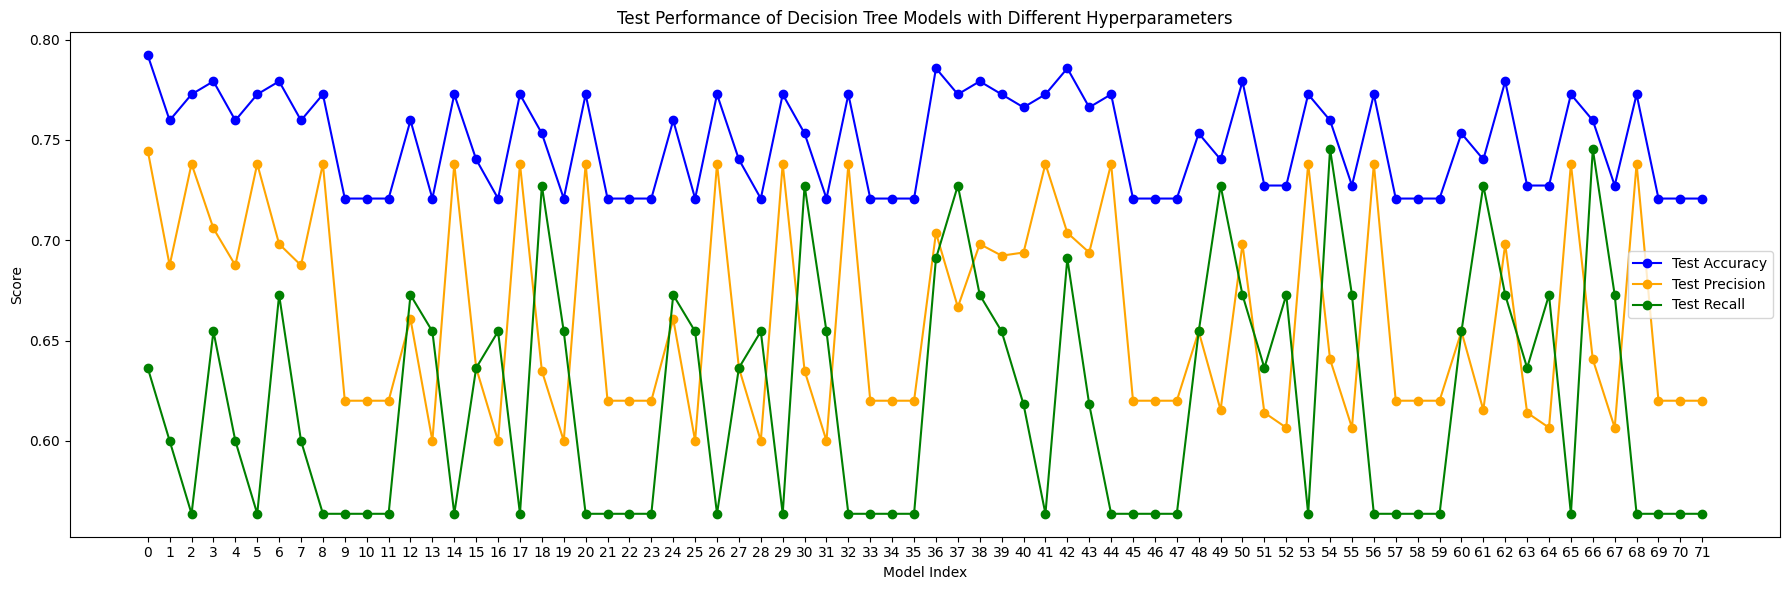

Hyperparameters for model 0: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}, Test Accuracy: 0.79, Test Precision: 0.74, Test Recall: 0.64
Hyperparameters for model 1: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 50}, Test Accuracy: 0.76, Test Precision: 0.69, Test Recall: 0.60
Hyperparameters for model 2: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 100}, Test Accuracy: 0.77, Test Precision: 0.74, Test Recall: 0.56
Hyperparameters for model 3: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 10}, Test Accuracy: 0.78, Test Precision: 0.71, Test Recall: 0.65
Hyperparameters for model 4: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 50}, Test Accuracy: 0.76, Test Precision: 0.69, Test Recall: 0.60
Hyperparameters for model 5: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, precision_score, recall_score, accuracy_score

param_grid = {
    'criterion': ['gini','entropy'],
    'max_depth': [5, 30,60],
    'min_samples_split': [10,50,100],
    'min_samples_leaf': [1,10, 20,50]
}

scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='binary'),
    'recall': make_scorer(recall_score, average='binary')
}

grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    scoring=scoring,
    refit='accuracy',
    cv=10,
    return_train_score=True
)

grid_search.fit(X_train, y_train)
test_results = []

for params in grid_search.cv_results_['params']:
    model = DecisionTreeClassifier(random_state=42, **params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    test_precision = precision_score(y_test, y_pred, average='binary', zero_division=0)
    test_recall = recall_score(y_test, y_pred, average='binary', zero_division=0)
    test_results.append({
        'params': params,
        'test_accuracy': test_accuracy,
        'test_precision': test_precision,
        'test_recall': test_recall
    })

test_results_df = pd.DataFrame(test_results)
plt.figure(figsize=(18, 6))

# Plot each metric
plt.plot(test_results_df.index, test_results_df['test_accuracy'], marker='o', label='Test Accuracy', color='blue')
plt.plot(test_results_df.index, test_results_df['test_precision'], marker='o', label='Test Precision', color='orange')
plt.plot(test_results_df.index, test_results_df['test_recall'], marker='o', label='Test Recall', color='green')

# Adding labels and title
plt.xlabel('Model Index')
plt.ylabel('Score')
plt.title('Test Performance of Decision Tree Models with Different Hyperparameters')
plt.xticks(test_results_df.index)
plt.legend()
plt.tight_layout()
plt.show()

for index, row in test_results_df.iterrows():
    print(f"Hyperparameters for model {index}: {row['params']}, Test Accuracy: {row['test_accuracy']:.2f}, "
          f"Test Precision: {row['test_precision']:.2f}, Test Recall: {row['test_recall']:.2f}")


printing the parameters for model which has the highest accuracy.

In [ ]:
best_model = test_results_df.loc[test_results_df['test_accuracy'].idxmax()]
print(f"Best Model Hyperparameters: {best_model['params']}")
print(f"Best Model Test Accuracy: {best_model['test_accuracy']:.2f}")
print(f"Best Model Test Precision: {best_model['test_precision']:.2f}")
print(f"Best Model Test Recall: {best_model['test_recall']:.2f}")


Best Model Hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best Model Test Accuracy: 0.79
Best Model Test Precision: 0.74
Best Model Test Recall: 0.64


in this part we just changed two parameters with different values.

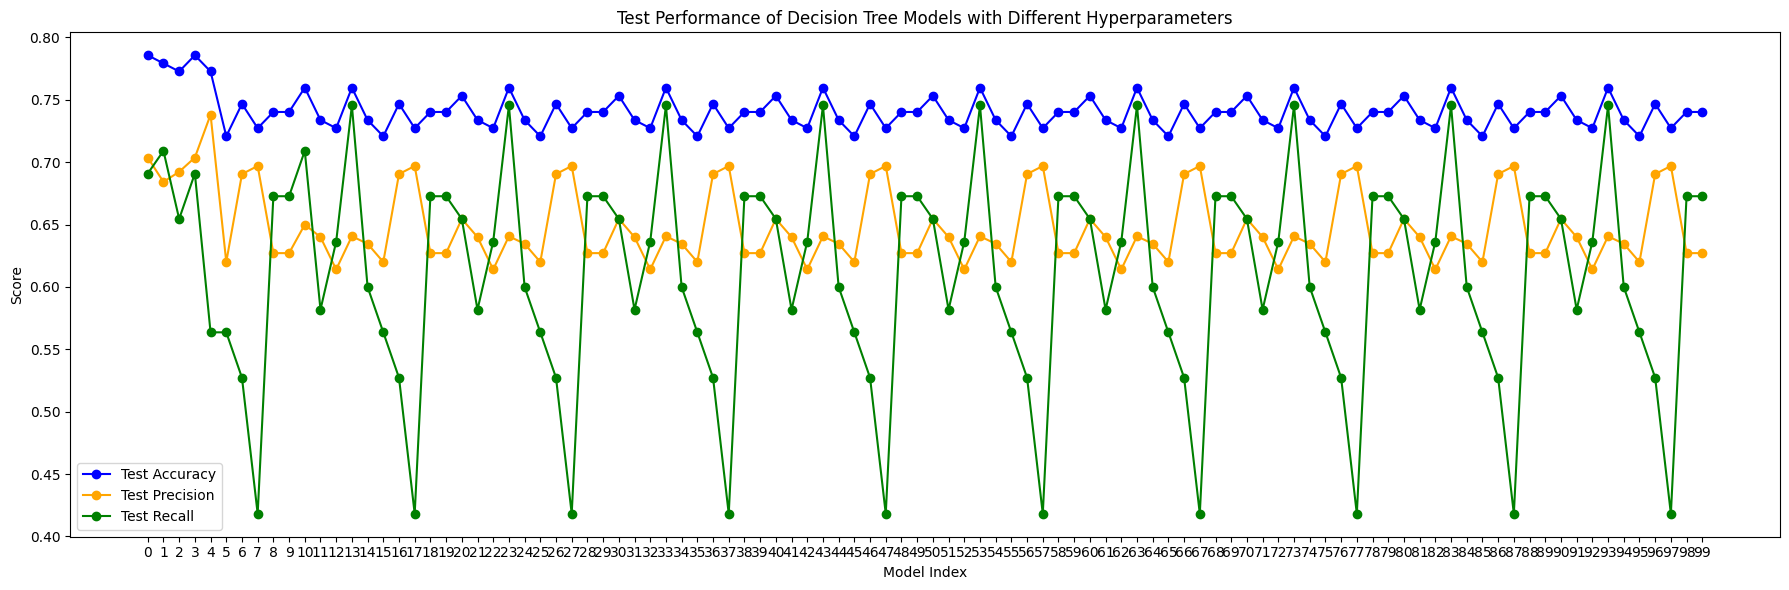

Hyperparameters for model 0: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}, Test Accuracy: 0.79, Test Precision: 0.70, Test Recall: 0.69
Hyperparameters for model 1: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 10}, Test Accuracy: 0.78, Test Precision: 0.68, Test Recall: 0.71
Hyperparameters for model 2: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 10}, Test Accuracy: 0.77, Test Precision: 0.69, Test Recall: 0.65
Hyperparameters for model 3: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 20, 'min_samples_split': 10}, Test Accuracy: 0.79, Test Precision: 0.70, Test Recall: 0.69
Hyperparameters for model 4: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 30, 'min_samples_split': 10}, Test Accuracy: 0.77, Test Precision: 0.74, Test Recall: 0.56
Hyperparameters for model 5: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 50, 'mi

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, precision_score, recall_score, accuracy_score

param_grid = {
    'criterion': ['entropy'],
    'max_depth': [5,10,20, 30,60,80,100,130,150,200],
    'min_samples_split': [10],
    'min_samples_leaf': [1,5,10, 20,,30,50,70,100,120,200]
}

scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='binary'),
    'recall': make_scorer(recall_score, average='binary')
}

grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    scoring=scoring,
    refit='accuracy',
    cv=10,
    return_train_score=True
)

grid_search.fit(X_train, y_train)
test_results = []

for params in grid_search.cv_results_['params']:
    model = DecisionTreeClassifier(random_state=42, **params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    test_precision = precision_score(y_test, y_pred, average='binary', zero_division=0)
    test_recall = recall_score(y_test, y_pred, average='binary', zero_division=0)
    test_results.append({
        'params': params,
        'test_accuracy': test_accuracy,
        'test_precision': test_precision,
        'test_recall': test_recall
    })

test_results_df = pd.DataFrame(test_results)
plt.figure(figsize=(18, 6))

# Plot each metric
plt.plot(test_results_df.index, test_results_df['test_accuracy'], marker='o', label='Test Accuracy', color='blue')
plt.plot(test_results_df.index, test_results_df['test_precision'], marker='o', label='Test Precision', color='orange')
plt.plot(test_results_df.index, test_results_df['test_recall'], marker='o', label='Test Recall', color='green')

# Adding labels and title
plt.xlabel('Model Index')
plt.ylabel('Score')
plt.title('Test Performance of Decision Tree Models with Different Hyperparameters')
plt.xticks(test_results_df.index)
plt.legend()
plt.tight_layout()
plt.show()

for index, row in test_results_df.iterrows():
    print(f"Hyperparameters for model {index}: {row['params']}, Test Accuracy: {row['test_accuracy']:.2f}, "
          f"Test Precision: {row['test_precision']:.2f}, Test Recall: {row['test_recall']:.2f}")


In [ ]:
pip install scikit-optimize


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 2.6 MB/s eta 0:00:00


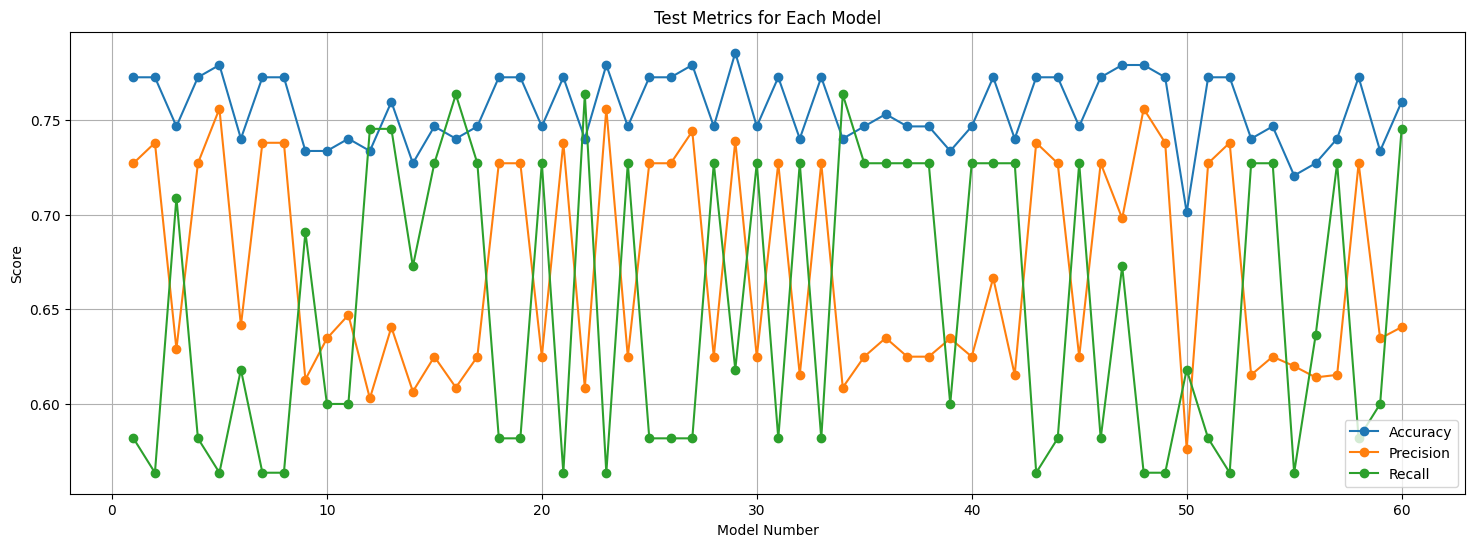

    model_num  accuracy  precision    recall  \
0           1  0.772727   0.727273  0.581818   
1           2  0.772727   0.738095  0.563636   
2           3  0.746753   0.629032  0.709091   
3           4  0.772727   0.727273  0.581818   
4           5  0.779221   0.756098  0.563636   
5           6  0.740260   0.641509  0.618182   
6           7  0.772727   0.738095  0.563636   
7           8  0.772727   0.738095  0.563636   
8           9  0.733766   0.612903  0.690909   
9          10  0.733766   0.634615  0.600000   
10         11  0.740260   0.647059  0.600000   
11         12  0.733766   0.602941  0.745455   
12         13  0.759740   0.640625  0.745455   
13         14  0.727273   0.606557  0.672727   
14         15  0.746753   0.625000  0.727273   
15         16  0.740260   0.608696  0.763636   
16         17  0.746753   0.625000  0.727273   
17         18  0.772727   0.727273  0.581818   
18         19  0.772727   0.727273  0.581818   
19         20  0.746753   0.625000  0.72

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from skopt import BayesSearchCV

# Define the parameter space for Bayesian optimization
param_space = {
    'criterion': ['gini','entropy'],
    'max_depth': (5, 100),  # Range for max_depth
    'min_samples_split': (2, 100),  # Range for min_samples_split
    'min_samples_leaf': (1, 60)  # Range for min_samples_leaf
}

# Initialize BayesSearchCV
bayes_search = BayesSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    search_spaces=param_space,
    n_iter=60,  # Number of parameter settings sampled
    scoring='accuracy',  # Only refitting based on accuracy
    cv=15,
    random_state=42
)

# Fit BayesSearchCV to find best parameters
bayes_search.fit(X_train, y_train)

# Prepare to collect test metrics for each model
test_metrics = []

# Evaluate each model from the search on test data
for i, params in enumerate(bayes_search.cv_results_['params']):
    # Train model on train data with the given parameters
    model = DecisionTreeClassifier(random_state=42, **params)
    model.fit(X_train, y_train)

    # Predict on test data and calculate metrics
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')

    # Store metrics along with model's parameters
    test_metrics.append({
        'model_num': i + 1,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'params': params
    })

# Convert test results to DataFrame
test_metrics_df = pd.DataFrame(test_metrics)

# Plot test metrics for each model
plt.figure(figsize=(18, 6))
plt.plot(test_metrics_df['model_num'], test_metrics_df['accuracy'], marker='o', label='Accuracy')
plt.plot(test_metrics_df['model_num'], test_metrics_df['precision'], marker='o', label='Precision')
plt.plot(test_metrics_df['model_num'], test_metrics_df['recall'], marker='o', label='Recall')
plt.title('Test Metrics for Each Model')
plt.xlabel('Model Number')
plt.ylabel('Score')
plt.legend()
plt.grid()
plt.show()

# Display test results with parameters for reference
print(test_metrics_df[['model_num', 'accuracy', 'precision', 'recall', 'params']])
